# Working with Seaborn

[Working with seaborn assignment](https://jswelling.github.io/CMU-MS-DAS-Vis-S25/assignment_seaborn.html)


In [2]:
import pandas as pd
import seaborn as sns

PATH_TO_CALIFORNIA_COUNTIES_DATA = "../data/california_counties.tsv"
PATH_TO_COVID_OFFSETS_DATA = "../data/covid_surge_offsets.tsv"

california_counties_df = pd.read_csv(
    PATH_TO_CALIFORNIA_COUNTIES_DATA, delimiter="\t"
)

covid_offsets_df = pd.read_csv(PATH_TO_COVID_OFFSETS_DATA, delimiter="\t")

In [3]:
# merge the two datasets
california_covid_merged_df = pd.merge(
    left=covid_offsets_df,
    right=california_counties_df,
    left_on="area",
    right_on="name"
)

# divide the population of each county by area in sq miles
california_covid_merged_df["population_density"] = california_covid_merged_df["area_sq_miles"] / \
    california_covid_merged_df["area_sq_miles"]

In [6]:
california_covid_merged_df.head()

,Unnamed: 0_x,area,surge_1_offset,surge_2_offset,surge_3_offset,surge_4_offset,Unnamed: 0_y,fips,name,seat,established,established_from,general_law_or_charter,population_2020,area_sq_miles,population_density
0,0,Alameda,165.0,342.0,559.0,707.0,0,1,Alameda,Oakland,1853,Contra Costa and Santa Clara,Charter,1682353,738,1.0
1,1,Alpine,46.0,278.0,584.0,703.0,1,3,Alpine,Markleeville,1864,"Amador, El Dorado, Calaveras, Mono and Tuolumne",General Law,1204,739,1.0
2,2,Amador,187.0,307.0,552.0,711.0,2,5,Amador,Jackson,1854,Calaveras,General Law,40474,606,1.0
3,3,Butte,209.0,338.0,590.0,711.0,3,7,Butte,Oroville,1850,'''''original''''',Charter,211632,1640,1.0
4,4,Calaveras,211.0,342.0,568.0,712.0,4,9,Calaveras,San Andreas,1850,'''''original''''',General Law,45292,1020,1.0


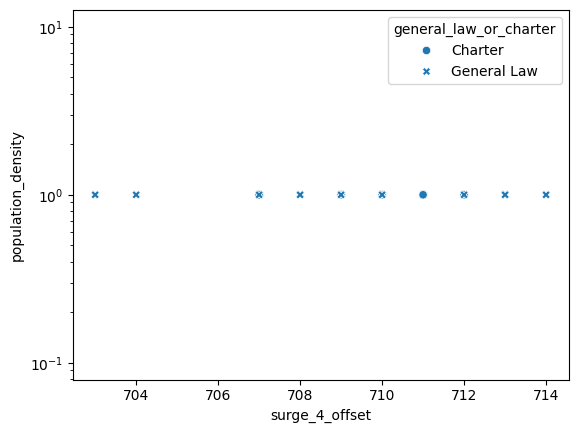

In [12]:
# create seaborn scatterplot

sns.scatterplot(data=california_covid_merged_df,
                x="surge_4_offset",
                y="population_density",
                style="general_law_or_charter",
                ).set_yscale("log")